필요한모듈 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

데이터셋 준비

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

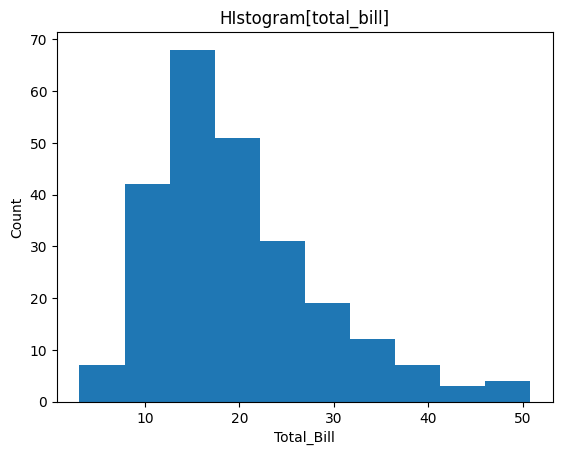

In [7]:
# 1. Figure 객체 생성.
fig = plt.figure()

# 2. Figure 객체의 Axis 설정 - Subplot을 생성.
# axis = fig.add_subplot(1, 1, 1)    # add_subplot(nrows, ncols, index)
axes = fig.add_subplot(111)        # add_subplot(pos): '행/열/인덱스' 순서로 만드어진 3자리 정수

# 3. Axis에 그래프를 그림.
axes.hist(x = tips.total_bill)

# 4. 그래프 옵션 설정.
axes.set_title('HIstogram[total_bill]')
axes.set_xlabel('Total_Bill')
axes.set_ylabel('Count')


# 5. 그래프 보여주기.
plt.show()

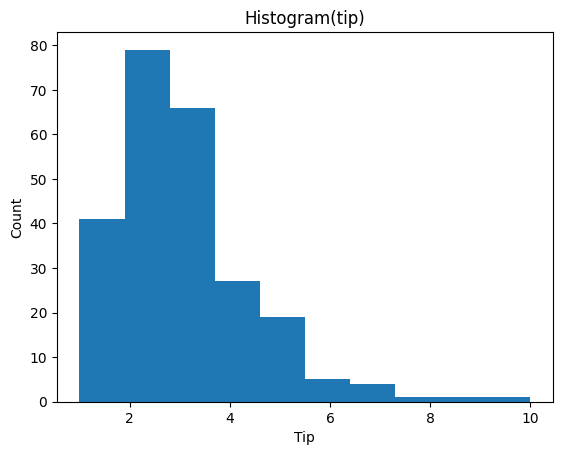

In [8]:
# 1. Figure, Axis 객체 생성
fig, axis = plt.subplots()      # subplots의 파라미터 nrows, ncols의 기본값 = 1

# 2. 그래프 그림
axis.hist(x = tips.tip)

# 3. 옵션 설정
axis.set_title('Histogram(tip)')
axis.set_xlabel('Tip')
axis.set_ylabel('Count')

# 4. 그래프 보여줌
plt.show()

1개의 Figure에 1개의 Subplot(Axes)만 있는 경우에는 matplotlib.pyplot 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot,...)만 이용할 수 있음.

top-level 그래프 함수를 사용하면 Figure, Axes 객체를 생성하는 코드를 작성할 필요가 없음.

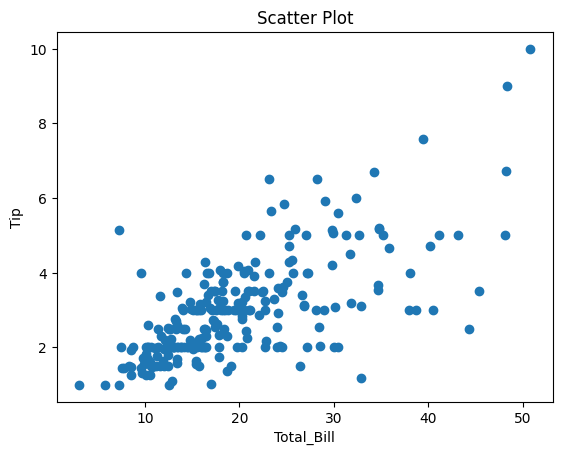

In [9]:
# 그래프 그림(Figure 생성, Axes 생성)
plt.scatter(x = tips.total_bill, y = tips.tip)

# 옵션 설정 - plt 모듈의 top-level 함수 이용
plt.title('Scatter Plot')
plt.xlabel('Total_Bill')
plt.ylabel('Tip')

# 그래프 보여주기
plt.show()

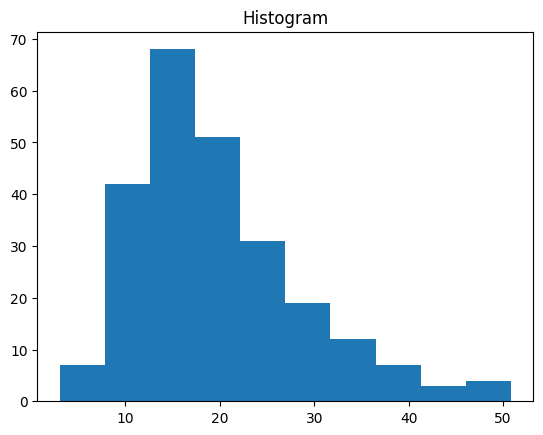

In [10]:
plt.hist(x= tips.total_bill)
plt.title('Histogram')
plt.show()

# Box Plot(상자 그림)

연속형 자료(숫자 타입 데이터)의 기술 통계량(최솟값, 25%, 중위값(중앙값), 75%, 최댓값)과 이상치(outlier)를 상자 모양으로 시각화.

In [11]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


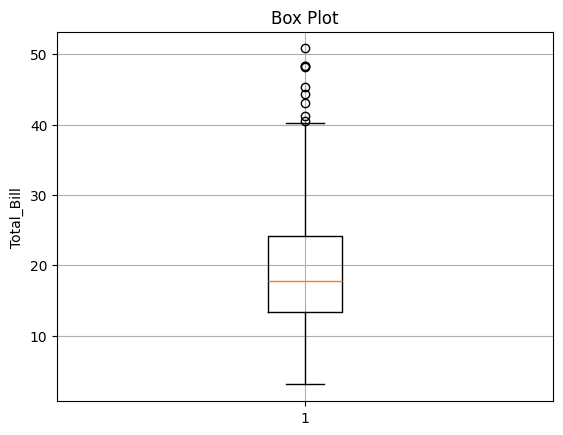

In [12]:
plt.boxplot(x = tips.total_bill)
plt.title('Box Plot')
plt.ylabel('Total_Bill')
plt.grid()
plt.show()

In [13]:
tips[['total_bill' , 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


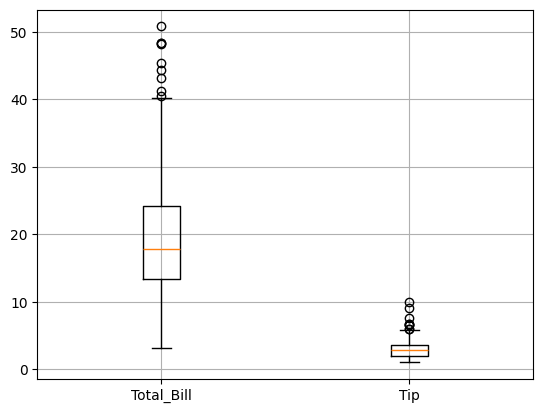

In [72]:
plt.boxplot(x = [tips.total_bill, tips.tip],
            tick_labels = ['Total_Bill' , 'Tip'])
plt.grid()
plt.show()

1개의 Figure에 2개의 subplot(Axes)을 좌/우로 배치. 왼쪽에는 total_bill의 box plot을, 오른쪽에는 tip의 box plot을 시각화

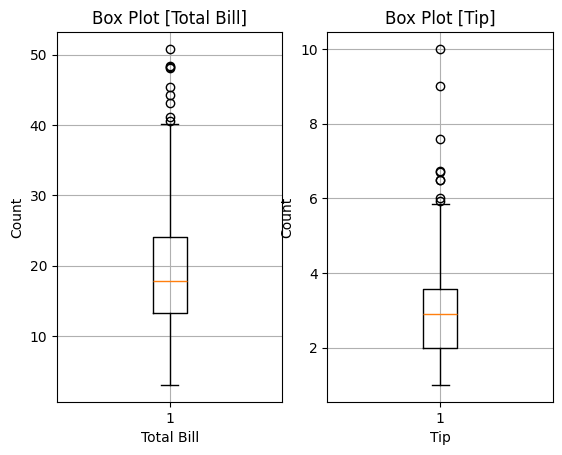

In [15]:
# 첫번째방법

fig = plt.figure()                           # Figure 객체 생성

#axes1
axes1 = fig.add_subplot(121)                 # 첫번째 Axis를 Figure에 추가
axes1.boxplot(x = tips.total_bill)
axes1.set_title('Box Plot [Total Bill]')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Count')
axes1.grid()

#axes2
axes2 = fig.add_subplot(122)                 # 두번째 Axes를 추가
axes2.boxplot(x = tips.tip)
axes2.set_title('Box Plot [Tip]')
axes2.set_xlabel('Tip')
axes2.set_ylabel('Count')
axes2.grid()

plt.show()

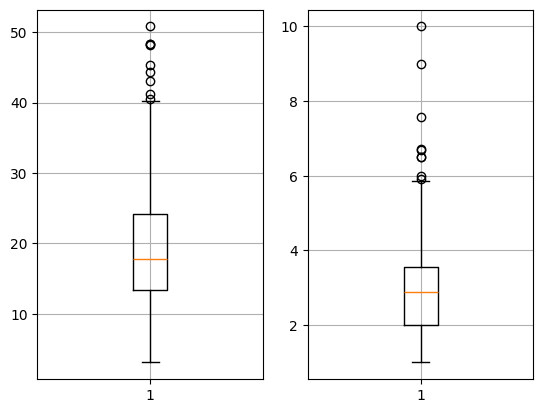

In [16]:
# 두번째 방법 (배열의 인덱스를 사용)

fig, axes = plt.subplots(ncols = 2)


# print(type(axes))   #> ndarray(배열)
# print(axes)         #> Axes 객체 2개를 저장하는 배열                                      #고로 axes는 배열이다.

#배열이니까
axes[0].boxplot(x = tips.total_bill)
axes[1].boxplot(x = tips.tip)

axes[0].grid()
axes[1].grid()

plt.show()

## 성별 팁의 box plot

*   남성(Male) tip의 기술 통계량 출력
*   여성(Female) tip의 기술 통계량 출력
*   성별 tip 의 box plot 을 1개의 Axes에 시각화.

In [17]:
male_tip = tips[tips.sex == 'Male'].tip
male_tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [18]:
female_tip = tips[tips.sex == 'Female'].tip
female_tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


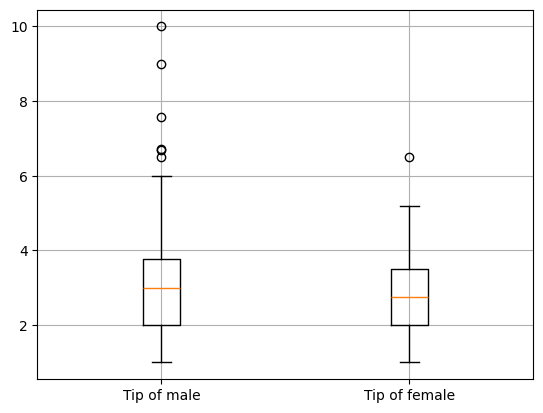

In [19]:
plt.boxplot( x = [male_tip, female_tip],
                  tick_labels = ['Tip of male', 'Tip of female'])
plt.grid()
plt.show()

## 시간 (Lunch, Dinner)별 tip의 box plot

In [20]:
lunch_tip = tips[tips.time == 'Lunch'].tip
lunch_tip

,tip
77,4.00
78,3.00
79,2.71
80,3.00
81,3.40
...,...
222,1.92
223,3.00
224,1.58
225,2.50


In [21]:
dinner_tip = tips[tips.time == 'Dinner'].tip
dinner_tip

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


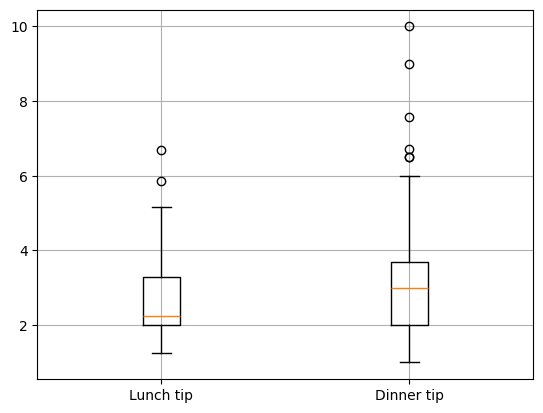

In [22]:
plt.boxplot(x = [lunch_tip, dinner_tip],
            tick_labels = ['Lunch tip', 'Dinner tip'])
plt.grid()
plt.show()

## 요일별 tip의 box plot

In [23]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [24]:
sat_tip = tips[tips.day == 'Sat']
sun_tip = tips[tips.day == 'Sun']
thur_tip = tips[tips.day == 'Thur']
fri_tip = tips[tips.day == 'Fri']

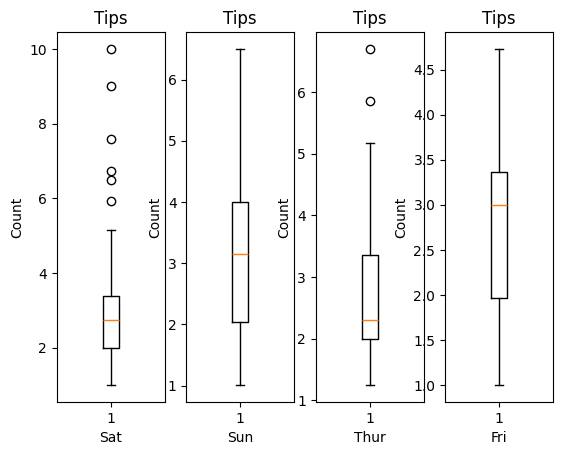

In [25]:
fig, axes = plt.subplots(ncols = 4)
for i,j in enumerate(['Sat','Sun', 'Thur', 'Fri']):
    axes[i].boxplot(x = tips[tips.day == j].tip)
    axes[i].set_title(f'Tips')
    axes[i].set_xlabel(f'{j}')
    axes[i].set_ylabel('Count')



### 오쌤방법

In [26]:
tips.day.unique()       #> DataFram에서 값이 등장하는 순서로 유일한 값들을 리턴.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [27]:
tips.day.cat.categories    #> data_frame.column.cat.categories: 카테고리 객체

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

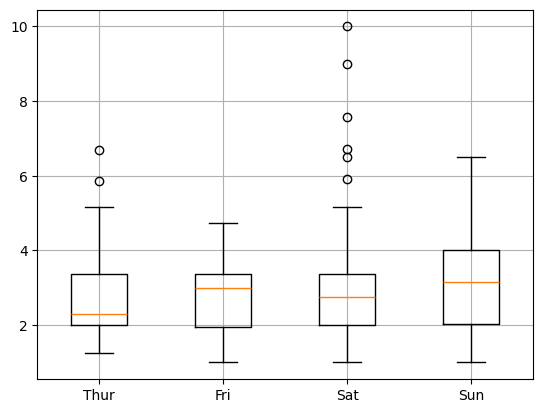

In [28]:
# 카테고리 객체는 배열처럼 for-in 반복문에서 사용할 수 있는 iterable 타입.

data = []       #> 요일별 tip 컬럼들을 저장하기 위한 빈 리스트

for c in tips.day.cat.categories:
    tip_by_day = tips[tips.day == c].tip
    data.append(tip_by_day)

plt.boxplot(x = data, tick_labels=tips.day.cat.categories)
plt.grid()
plt.show()

# Histogram(히스토그램)

연속형 자료(숫자 타입 데이터)를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 시각화 한 그래프.

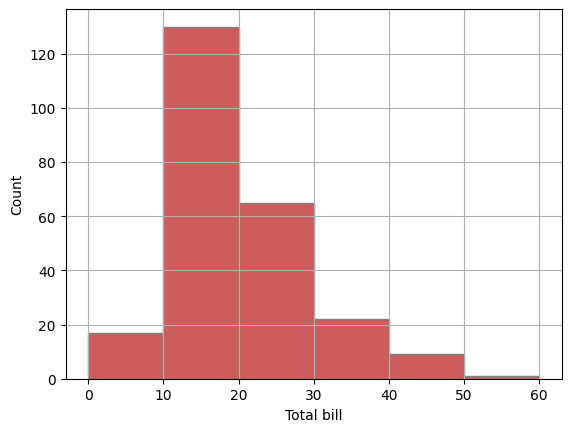

In [29]:
plt.hist(x = tips.total_bill,           # x = 히스토그램을 그리기 위한 연속형 자료(변수, 컬럼)
         bins = np.arange(0, 70, 10),   # bins = 막대 개수 또는 구간(배열)
         edgecolor = 'gray',           # edgecolor = 막대 테두리 색깔
         color = 'indianred')              # color = 막대 내부를 채우는 색깔
plt.grid()
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.show()


# plt.yticks([a,b,c,d]) >> y축의 값들을 조절 할 수 있다.

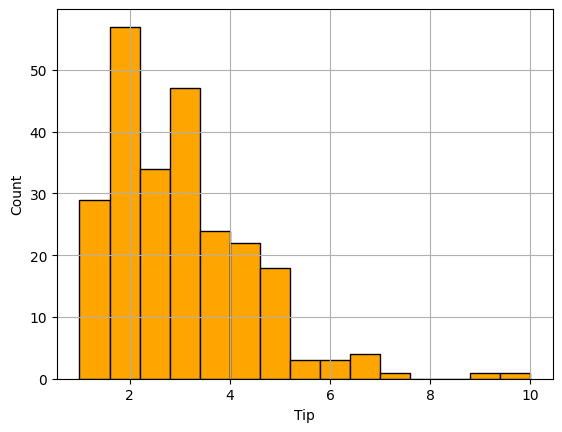

In [30]:
# tip의 히스토그램
plt.hist( x = tips.tip,
         bins = 15,
         edgecolor = 'black',
         color = 'orange')
plt.grid()
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

# Bar Plot(막대 그래프)

카테고리(범주) 타입의 변수(컬럼)의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(vertical bar plot)

In [31]:
gender_count = tips.sex.value_counts()
gender_count

,count
sex,
Male,157
Female,87


In [32]:
print(type(gender_count))

<class 'pandas.core.series.Series'>


In [33]:
gender_count.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [34]:
gender_count.values

array([157,  87])

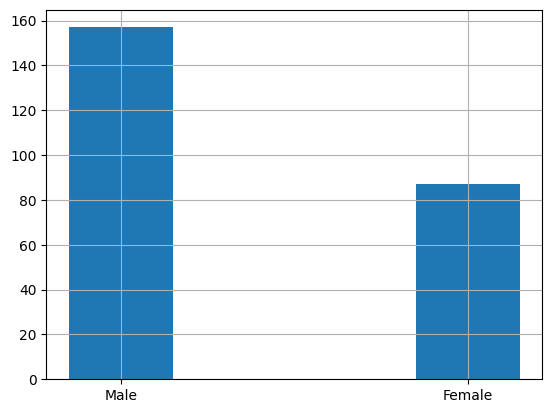

In [35]:
plt.bar(x = gender_count.index, height = gender_count.values, width = 0.3)
plt.grid()
plt.show()

## 가로 막대 그래프(horizontal bar plot)

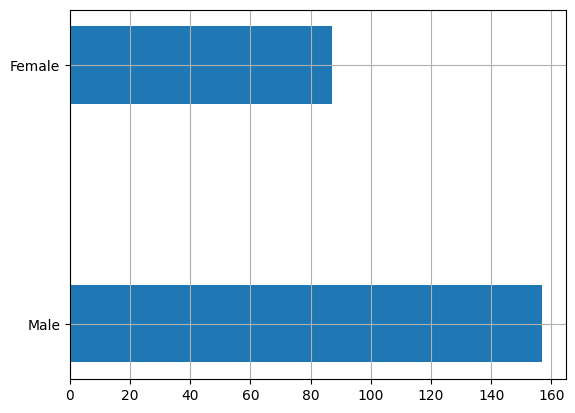

In [36]:
plt.barh(y = gender_count.index,
         width = gender_count.values,
         height = 0.3)
plt.grid()
plt.show()

테이블의 손님 수(size)의 빈도수를 세로 막대 그래프로 시각화.

In [37]:
t_size = tips['size'].value_counts()
t_size

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


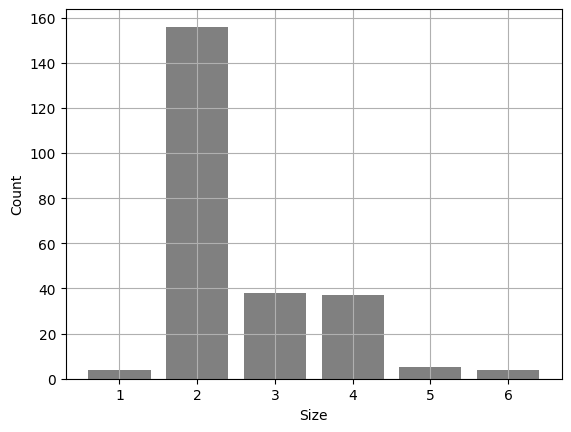

In [38]:
plt.bar(x = t_size.index, height = t_size.values, color= 'gray')
plt.xlabel('Size')
plt.ylabel('Count')
plt.grid()

plt.show()

요일의 빈도수를 가로 막대 그래프로 시각화

In [39]:
t_day = tips.day.value_counts()
t_day

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


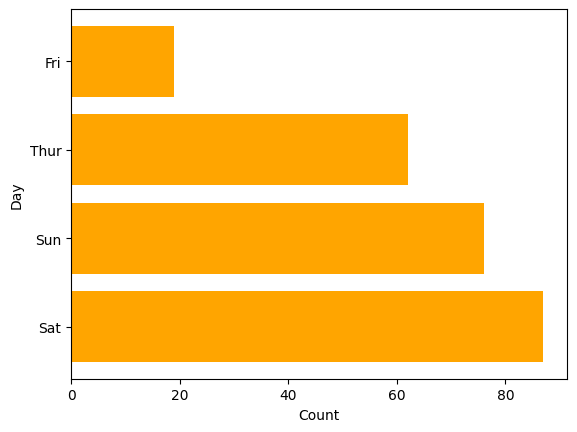

In [40]:
plt.barh(y = t_day.index, width = t_day.values, color = 'orange')
plt.xlabel('Count')
plt.ylabel('Day')
plt.show()

*   4개의 Axes(subplot)을 2x2 모양(nrows = 2, ncols =2 )으로 생성
*   각 axes에 성별 빈도수, 흡연 여부 빈도수, 요일 빈도수, 시간 빈도수 막대 그래프를 시각화

In [41]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
t_sex = tips.sex.value_counts()
t_sex

,count
sex,
Male,157
Female,87


In [43]:
t_smoke = tips.smoker.value_counts()
t_smoke

,count
smoker,
No,151
Yes,93


In [44]:
t_day = tips.day.value_counts()
t_day

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [45]:
t_time = tips.time.value_counts()
t_time

,count
time,
Dinner,176
Lunch,68


Text(0.5, 1.0, 'Time')

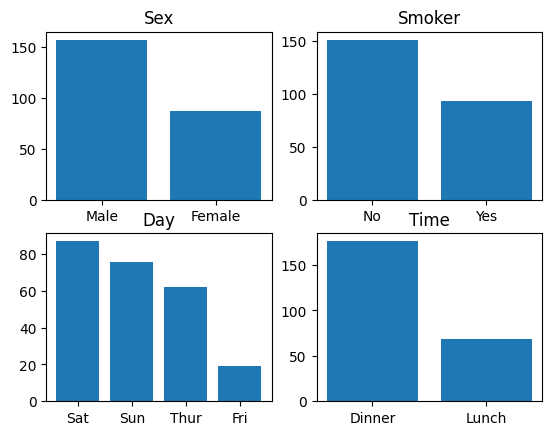

In [46]:
fig, axes = plt.subplots(2,2)

axes[0,0].bar(t_sex.index, t_sex.values)
axes[0,0].set_title('Sex')

axes[0,1].bar(t_smoke.index, t_smoke.values)
axes[0,1].set_title('Smoker')

axes[1,0].bar(t_day.index, t_day.values)
axes[1,0].set_title('Day')

axes[1,1].bar(t_time.index, t_time.values)
axes[1,1].set_title('Time')

오쌤 방법

In [47]:
gender_count = tips.sex.value_counts()
day_count = tips.day.value_counts()
smoker_count = tips.smoker.value_counts()
time_count = tips.time.value_counts()

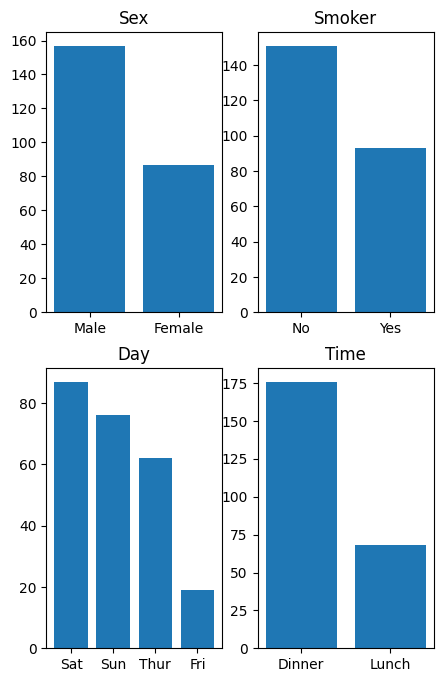

In [48]:
#1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(5, 8))
# print(axes)   #> 2차원 ndarray
# 그 이후로는 내가 쓴 방법.
axes[0,0].bar(x =gender_count.index, height = gender_count.values)
axes[0,0].set_title('Sex')

axes[0,1].bar(x= smoker_count.index, height = smoker_count.values)
axes[0,1].set_title('Smoker')

axes[1,0].bar(x= day_count.index, height = day_count.values)
axes[1,0].set_title('Day')

axes[1,1].bar(x= time_count.index, height = time_count.values)
axes[1,1].set_title('Time')

plt.show()

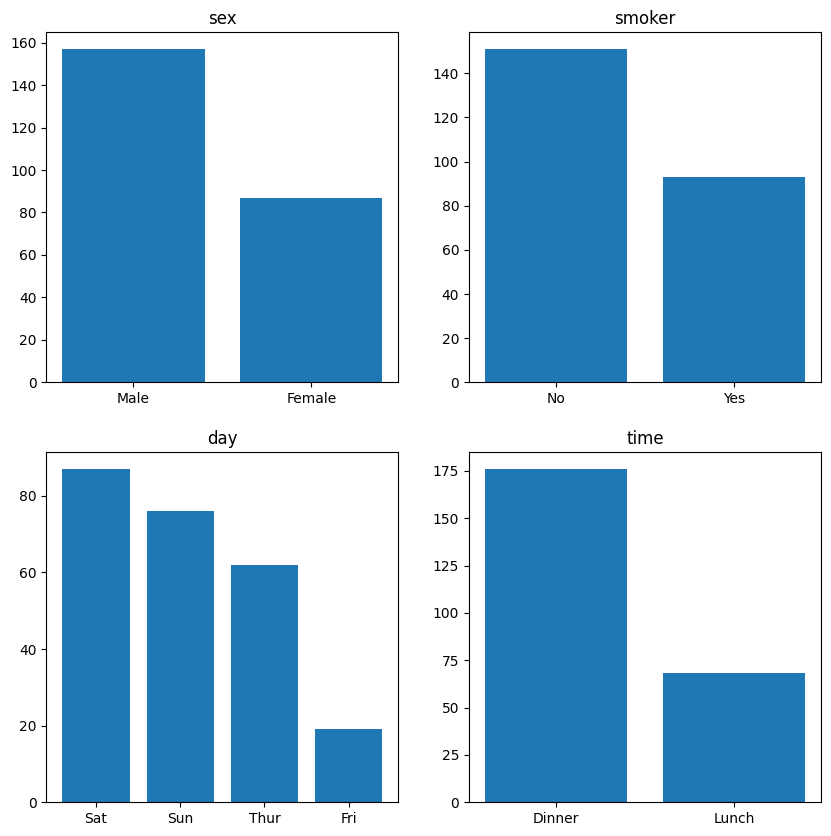

In [49]:
titles = [['sex','smoker'], ['day', 'time']]

fig, axes = plt.subplots(nrows = 2, ncols = 2 , figsize = (10,10))

for i, r in enumerate(titles):
    for j, r2 in enumerate(r):
        # print(i,j,r2)
        data = tips[r2].value_counts()
        axes[i,j].bar(x = data.index, height = data.values)
        axes[i,j].set_title(r2)

plt.show()

# Scatter Plot(산점도)

*   두 변수(컬럼) 간의 상관 관계를 알고 싶을 때 사용.
*   `y ~ x` 관계 시각화.
    *   `y`: 관심 변수, 종속 변수.
    *   `x`: 독립 변수.

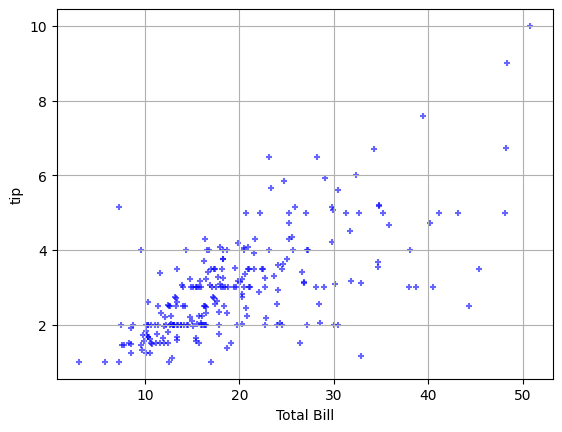

In [50]:
plt.scatter(x = tips.total_bill, y = tips.tip,      # x, y: x축, y축에 사용할 변수(컬럼)
            alpha = 0.6,                            # alpha: 투명도(0: 투명 ~ 1:불투명)
            s = 20,                                 # s: size. 마커의 크기
            c ='blue',                         # c: color. 마커의 색깔
            marker = '+')                           # marker: 마커의 모양(o,s,v,^,*,+,...)
plt.xlabel('Total Bill')
plt.ylabel('tip')
plt.grid()
plt.show()

*   tip ~ total_bill 상관 관계를 산점도로 시각화.
*   성별에 따라서 마커의 색깔을 다르게 표시.

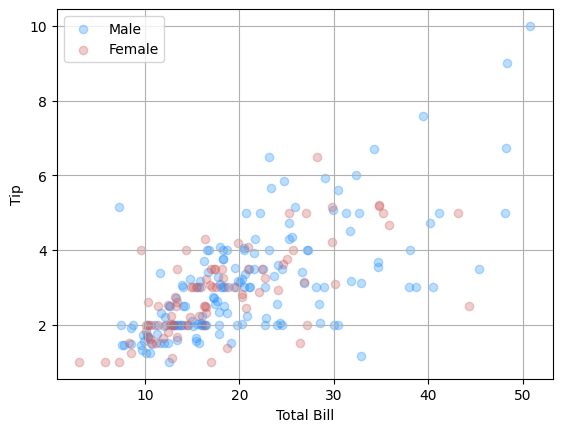

In [51]:
male_df = tips[tips.sex == 'Male']
female_df = tips[tips.sex == 'Female']

plt.scatter(x = male_df.total_bill, y = male_df.tip,
            alpha = 0.3,
            label = 'Male',
            c = 'dodgerblue')
plt.scatter(x = female_df.total_bill, y = female_df.tip,
            alpha = 0.3,
            label = 'Female',
            c = 'indianred')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()        # 범례 표시 -  각각의 산점도의 레이블을 표시.
plt.grid()
plt.show()

*   tip ~ total_bill 산점도
*   성별에 따라서 마커의 색깔을 다르게 지정.
*   흡연 여부에 따라서 마커의 모양을 다르게 지정.

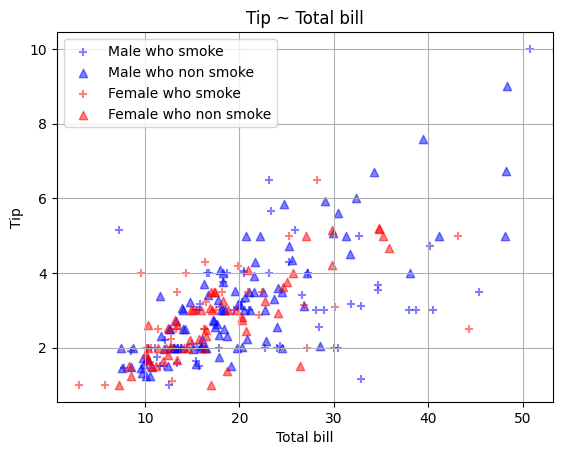

In [52]:
ms_df = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]
mns_df = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]
fs_df = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]
fns_df = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]

plt.scatter(x = ms_df.total_bill, y = ms_df.tip,
            c = 'blue',
            alpha = 0.5,
            marker = '+',
            label = 'Male who smoke')
plt.scatter(x = mns_df.total_bill, y = mns_df.tip,
            c = 'blue',
            alpha = 0.5,
            marker = '^',
            label = 'Male who non smoke')
plt.scatter(x = fs_df.total_bill, y = fs_df.tip,
            c = 'red',
            alpha = 0.5,
            marker = '+',
            label = 'Female who smoke')
plt.scatter(x = fns_df.total_bill, y = fns_df.tip,
            c = 'red',
            alpha = 0.5,
            marker = '^',
            label = 'Female who non smoke')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Tip ~ Total bill')
plt.grid()
plt.legend()        # 각각의 scatter 함수의 label을 범례 표시.

plt.show()

In [53]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

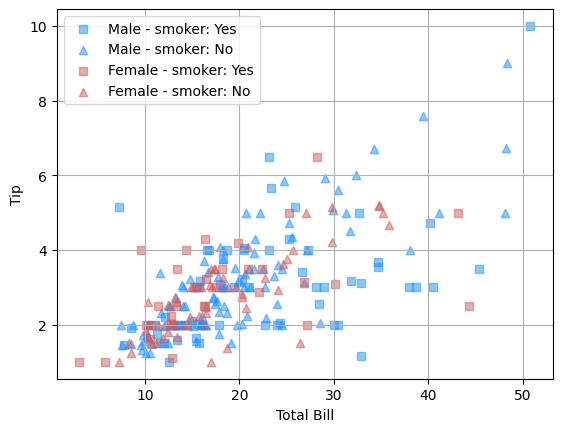

In [54]:
gender = tips.sex.cat.categories        # tips.sex.unique()
smoker = tips.smoker.cat.categories
colors = ['dodgerblue','indianred']    # 성별에 따라서 다르게 표시할 색상 이름
markers = ['s', '^']                    # 흡연 여부에 따라서 다르게 표시할 마커 모양

for g,c in zip(gender, colors):
    for s , m in zip(smoker, markers):
        subset_df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x = subset_df.total_bill, y = subset_df.tip,
                    alpha = 0.5, c = c , marker = m,
                    label = f'{g} - smoker: {s}')

plt.legend()
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

*   1개의 Figure에 상/하 2개의 Axes를 생성
*   위쪽 Axes에 total_bill 히스토그램을 작성.
*   아래쪽 Axes에 tip ~ total_bill 산점도를 작성

Text(0.5, 1.0, 'Tip ~ Total bill Scatter')

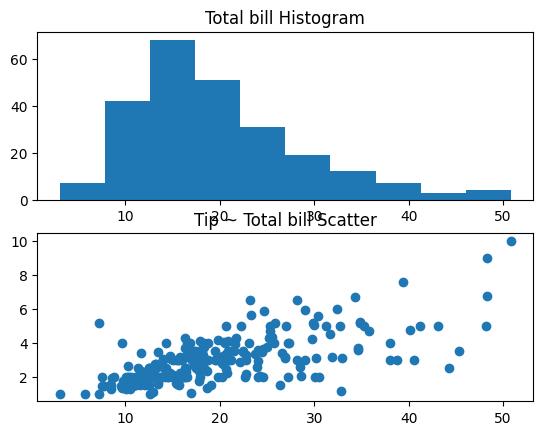

In [55]:
fig, axes = plt.subplots(nrows = 2)

axes[0].hist(x = tips.total_bill)
axes[0].set_title('Total bill Histogram')

axes[1].scatter(x = tips.total_bill, y = tips.tip)
axes[1].set_title('Tip ~ Total bill Scatter')

# Line plot(선 그래프)

주로 시계열 데이터(주식, 부동산, 지지율, 원자재 가격, 미세먼지 농도, ...)를 시각화.

In [56]:
# 선 그래프를 그리기 위한 가상 데이터
np.random.seed(1)
df = pd.DataFrame(data = {
    'day': np.arange(1,11),
    'price': np.random.rand(10)
})
df

,day,price
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


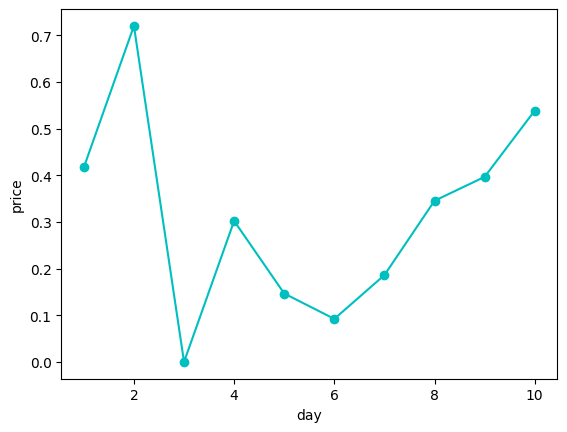

In [57]:
# plt.plot(x 좌표로 사용할 변수, y 좌표로 사용할 변수, 포맷 문자열)
# 포맷 문자열: color(선과 마커의 색깔), marker(마커모양), linestyle(선 스타일/모양)
#   color: r(red), g(green), b(blue), k(black), y(yellow), ...
#   marker: o, s, ^, v, *, +
#   linestyle: -(직선, solid line), --(dashed line), :(점선, dotted line), ...
plt.plot(df.day, df.price, 'co-')

plt.xlabel('day')
plt.ylabel('price')
plt.show()

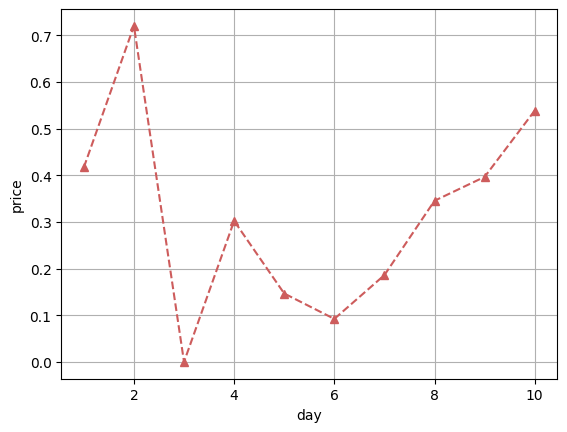

In [58]:
plt.plot(df.day, df.price,
         color = 'indianred',
         linestyle = '--',
         marker = '^')

plt.grid()
plt.xlabel('day')
plt.ylabel('price')

plt.show()

# 연습문제 1.
아래의 데이터 프레임에서 samsung, hynix, nvidia 데이터를 선 그래프로 그리세요.

*   선 그래프 3개가 함께 표현
*   각각의 데이터는 다른 색깔, 마커, 선 스타일로 표현
*   범례 표시

In [59]:
np.random.seed(1)
df = pd.DataFrame({
    'samsung': np.random.rand(10),
    'hynix': np.random.rand(10),
    'nvidia': np.random.rand(10)
})
df

,samsung,hynix,nvidia
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


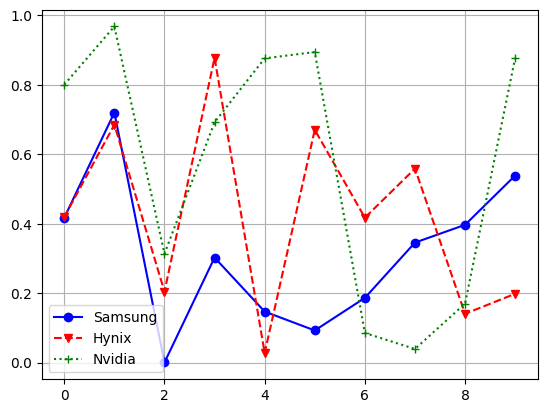

In [74]:

plt.plot(df.samsung,'bo-',
         label = 'Samsung')

plt.plot(df.hynix,'rv--',
         label = 'Hynix')

plt.plot(df.nvidia,'g+:',
         label = 'Nvidia')

plt.grid()
plt.legend()

plt.show()

#연습문제 2.
iris 데이터셋 시각화.

*   seaborn 패키지의 iris 예제 데이터셋 로드
*   DataFrame 확인(head, info, describe, value_counts 등)
*   petal_width ~ petal_length 산점도
*   species 별로 마커의 색깔을 다르게 표현

In [61]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
#기술 통계량
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
# 카테고리 타입 빈도수
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [66]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
seto = iris[iris.species == 'setosa']
versi = iris[iris.species == 'versicolor']
virgin = iris[iris.species == 'virginica']

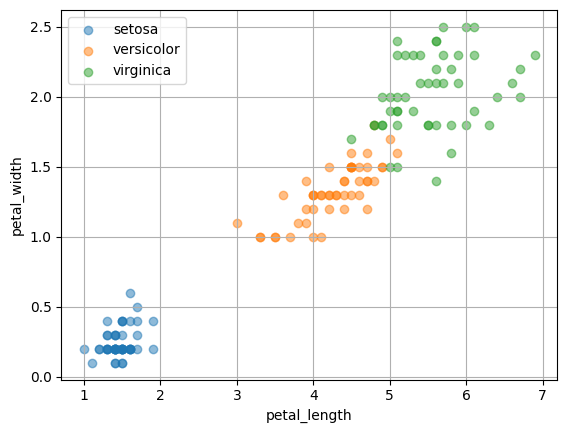

In [68]:
plt.scatter(x = seto.petal_length, y = seto.petal_width,
            label = 'setosa',
            alpha = 0.5)

plt.scatter(x = versi.petal_length, y = versi.petal_width,
            label = 'versicolor',
            alpha = 0.5)

plt.scatter(x = virgin.petal_length, y = virgin.petal_width,
            label = 'virginica',
            alpha = 0.5)

plt.grid()
plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.show()

In [69]:
species = iris.species.unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

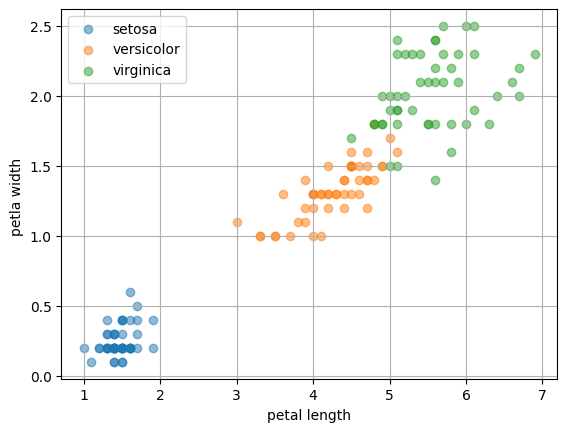

In [70]:
for s in species:
    subset_df = iris[iris.species == s]
    plt.scatter(x = subset_df.petal_length, y = subset_df.petal_width, label = s, alpha = 0.5)

plt.legend()
plt.grid()
plt.xlabel('petal length')
plt.ylabel('petla width ')
plt.show()